<a href="https://colab.research.google.com/github/DIPANJAN001/TalkJulia_with_Randy/blob/main/compare8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install Boruta
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import concatenate
from keras import Model
from keras.layers import Input
from keras.layers import Bidirectional
from keras import layers
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import load_model
from keras.layers import Input
from sklearn.decomposition import PCA 
from sklearn.metrics import mean_absolute_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 2.3 MB/s 


In [ ]:
df=pd.read_excel("/content/pv_05.xlsx")
weather_input1=df.drop('power_normed',axis=1)
weather_input=weather_input1.drop('time_idx',axis=1)
solpow=df['power_normed']

In [ ]:
def lstm_data_transform(x_data, y_data, num_steps):
    """ Changes data to the format for LSTM training 
for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

In [ ]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import load_model
from keras.layers import Input

In [ ]:
n_inputs=weather_input.shape[1]

In [ ]:
input_data_shape= Input(shape=(n_inputs,))
# encoder level 1
encoder= Dense(n_inputs*2)(input_data_shape)
encoder = BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# encoder level 2
encoder= Dense(n_inputs)(encoder)
encoder= BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# bottleneck
#n_bottleneck = round(float(n_inputs) / 2.0)
n_bottleneck = 20
bottleneck = Dense(n_bottleneck)(encoder)
# define decoder, level 1
decoder = Dense(n_inputs)(bottleneck)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)
# decoder level 2
decoder = Dense(n_inputs*2)(decoder)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)

In [ ]:
output = Dense(n_inputs, activation='linear')(decoder)
# define autoencoder model
model = Model(inputs=input_data_shape, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [ ]:
 model.fit(weather_input,weather_input, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
198/198 - 3s - loss: 0.0958 - 3s/epoch - 13ms/step
Epoch 2/100
198/198 - 1s - loss: 0.0186 - 868ms/epoch - 4ms/step
Epoch 3/100
198/198 - 1s - loss: 0.0149 - 661ms/epoch - 3ms/step
Epoch 4/100
198/198 - 1s - loss: 0.0126 - 712ms/epoch - 4ms/step
Epoch 5/100
198/198 - 1s - loss: 0.0113 - 691ms/epoch - 3ms/step
Epoch 6/100
198/198 - 1s - loss: 0.0104 - 701ms/epoch - 4ms/step
Epoch 7/100
198/198 - 1s - loss: 0.0102 - 637ms/epoch - 3ms/step
Epoch 8/100
198/198 - 1s - loss: 0.0094 - 936ms/epoch - 5ms/step
Epoch 9/100
198/198 - 1s - loss: 0.0091 - 1s/epoch - 7ms/step
Epoch 10/100
198/198 - 1s - loss: 0.0088 - 1s/epoch - 7ms/step
Epoch 11/100
198/198 - 1s - loss: 0.0084 - 1s/epoch - 7ms/step
Epoch 12/100
198/198 - 1s - loss: 0.0079 - 1s/epoch - 7ms/step
Epoch 13/100
198/198 - 1s - loss: 0.0076 - 1s/epoch - 7ms/step
Epoch 14/100
198/198 - 1s - loss: 0.0079 - 1s/epoch - 6ms/step
Epoch 15/100
198/198 - 1s - loss: 0.0072 - 1s/epoch - 6ms/step
Epoch 16/100
198/198 - 1s - loss: 0.0071 -

In [ ]:
# define an encoder model (without the decoder)
encoder = Model(inputs=input_data_shape, outputs=bottleneck)
# save the encoder to file
encoder.save('encoder.h5')

In [ ]:
#solpow=solpow.to_numpy().reshape(-1,1)
encoder = load_model('encoder.h5')

# encode the train data
X_train_encode = encoder.predict(weather_input)

198/198 [==============================] - 0s 2ms/step


In [ ]:
encoder = load_model('encoder.h5')

# encode the train data
X_train_encode = encoder.predict(weather_input)

198/198 [==============================] - 0s 2ms/step


In [ ]:
num_steps = 2
# training set
(x_transformed1,
 y_transformed1) = lstm_data_transform(X_train_encode,solpow , num_steps=num_steps)
assert x_transformed1.shape[0] == y_transformed1.shape[0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_transformed1, y_transformed1, test_size=0.4, random_state=42,shuffle=False)

In [ ]:
inputs1=Input(shape=(X_train.shape[1],X_train.shape[2]))

In [ ]:
from keras import optimizers
opt=optimizers.Adam(learning_rate=0.001)

Epoch 1/100
48/48 [==============================] - 15s 71ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 2/100
48/48 [==============================] - 2s 40ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3/100
48/48 [==============================] - 2s 40ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 9.0122e-04 - val_mse: 9.0122e-04
Epoch 4/100
48/48 [==============================] - 2s 41ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 8.5949e-04 - val_mse: 8.5949e-04
Epoch 5/100
48/48 [==============================] - 2s 41ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 8.2404e-04 - val_mse: 8.2404e-04
Epoch 6/100
48/48 [==============================] - 2s 41ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 9.4333e-04 - val_mse: 9.4333e-04
Epoch 7/100
48/48 [==============================] - 2s 41ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.5576e-04 - val_mse: 7.5576e-04
Epoch 8/100
48/48 [================

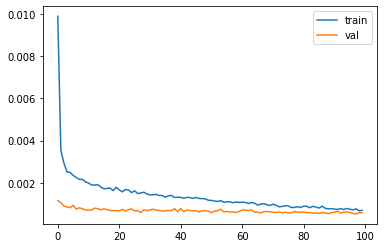

79/79 [==============================] - 2s 8ms/step


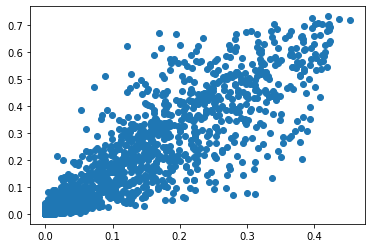

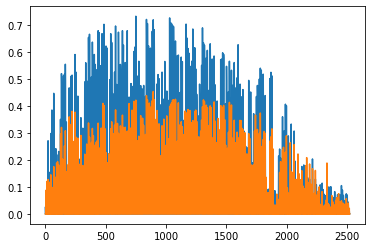

0.09756717962615448
0.050313805167448836


In [ ]:
def define_model():


  # firs
  fe1_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = LSTM(24, activation='relu',return_sequences = True)(fe1_1)
  fe1_3= Dropout(0.5)(fe1_2)
  fe1_4=LSTM(30, activation='relu')(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe2_1 = Dropout(0.5)(fe2_0)
  fe2_2 = LSTM(60, activation='relu',return_sequences = True)(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=LSTM(4, activation='relu')(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =LSTM(104, activation='relu',return_sequences = True)(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = LSTM(96, activation='relu',return_sequences = True)(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=LSTM(8, activation='relu')(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  #merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 100,validation_split=0.2,batch_size =64 )
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

Epoch 1/200
48/48 [==============================] - 15s 72ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 2/200
48/48 [==============================] - 2s 39ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 7.8683e-04 - val_mse: 7.8683e-04
Epoch 3/200
48/48 [==============================] - 2s 41ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 9.6628e-04 - val_mse: 9.6628e-04
Epoch 4/200
48/48 [==============================] - 2s 41ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.6580e-04 - val_mse: 7.6580e-04
Epoch 5/200
48/48 [==============================] - 2s 41ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.1284e-04 - val_mse: 8.1284e-04
Epoch 6/200
48/48 [==============================] - 2s 40ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.0812e-04 - val_mse: 8.0812e-04
Epoch 7/200
48/48 [==============================] - 2s 41ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.8133e-04 - val_mse: 7.8133e-04
Epoch 8/200
48/48 [========

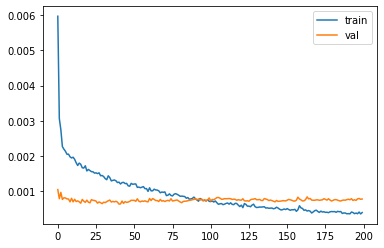

79/79 [==============================] - 2s 8ms/step


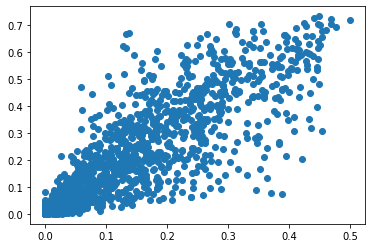

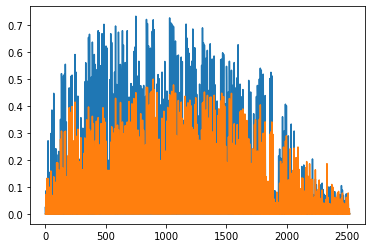

0.09746092565461494
0.05043274461776526


In [ ]:
def define_model():


  # firs
  fe1_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = LSTM(24, activation='relu',return_sequences = True)(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=LSTM(30, activation='relu')(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = LSTM(60, activation='relu',return_sequences = True)(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=LSTM(4, activation='relu')(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =LSTM(104, activation='relu',return_sequences = True)(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = LSTM(96, activation='relu',return_sequences = True)(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=LSTM(8, activation='relu')(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  #merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 200,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

In [ ]:
from keras.layers import Bidirectional


Epoch 1/100
48/48 [==============================] - 29s 146ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 9.5108e-04 - val_mse: 9.5108e-04
Epoch 2/100
48/48 [==============================] - 4s 86ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 8.3944e-04 - val_mse: 8.3944e-04
Epoch 3/100
48/48 [==============================] - 4s 84ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.5717e-04 - val_mse: 7.5717e-04
Epoch 4/100
48/48 [==============================] - 4s 84ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4636e-04 - val_mse: 7.4636e-04
Epoch 5/100
48/48 [==============================] - 4s 85ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 6.6867e-04 - val_mse: 6.6867e-04
Epoch 6/100
48/48 [==============================] - 4s 85ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 7.0203e-04 - val_mse: 7.0203e-04
Epoch 7/100
48/48 [==============================] - 4s 83ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 6.1745e-04 - val_mse: 6.1745e-04
Epoch 8/100
48/48 

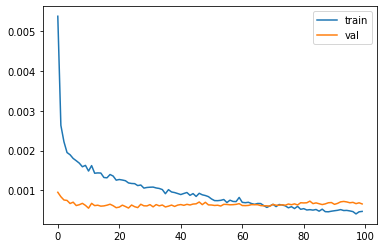

79/79 [==============================] - 4s 15ms/step


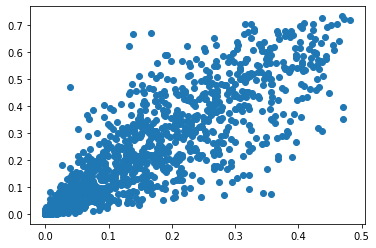

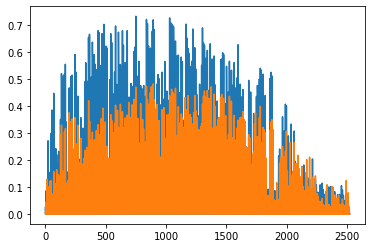

0.09300085816515513
0.04757577785119768


In [ ]:
def define_model():


  # firs
  fe1_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = Bidirectional(LSTM(24, activation='relu',return_sequences = True))(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=Bidirectional(LSTM(30, activation='relu'))(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = Bidirectional(LSTM(60, activation='relu',return_sequences = True))(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=Bidirectional(LSTM(4, activation='relu'))(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =Bidirectional(LSTM(104, activation='relu',return_sequences = True))(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = Bidirectional(LSTM(96, activation='relu',return_sequences = True))(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  #merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs =100,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

Epoch 1/100
48/48 [==============================] - 30s 146ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 9.4844e-04 - val_mse: 9.4844e-04
Epoch 2/100
48/48 [==============================] - 4s 85ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 8.0223e-04 - val_mse: 8.0223e-04
Epoch 3/100
48/48 [==============================] - 4s 84ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.8372e-04 - val_mse: 7.8372e-04
Epoch 4/100
48/48 [==============================] - 4s 85ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.7859e-04 - val_mse: 7.7859e-04
Epoch 5/100
48/48 [==============================] - 4s 84ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 7.7501e-04 - val_mse: 7.7501e-04
Epoch 6/100
48/48 [==============================] - 4s 84ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 7.7427e-04 - val_mse: 7.7427e-04
Epoch 7/100
48/48 [==============================] - 4s 84ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 7.1532e-04 - val_mse: 7.1532e-04
Epoch 8/100
48/48 

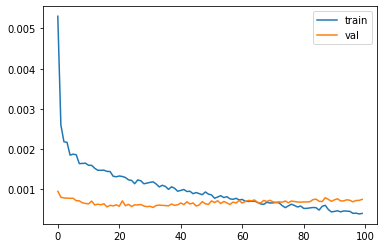

79/79 [==============================] - 4s 15ms/step


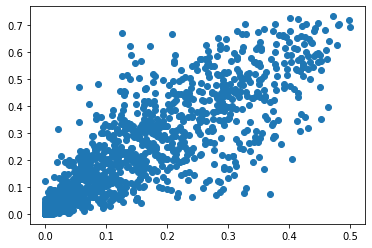

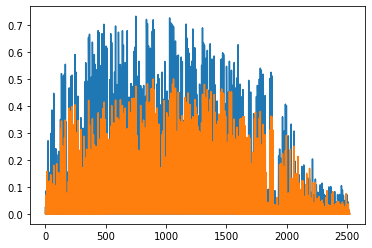

0.09406344446092134
0.04883888664675549


In [ ]:
def define_model():


  # firs
  fe1_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = Bidirectional(LSTM(24, activation='relu',return_sequences = True))(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=Bidirectional(LSTM(30, activation='relu'))(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = Bidirectional(LSTM(60, activation='relu',return_sequences = True))(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=Bidirectional(LSTM(4, activation='relu'))(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =Bidirectional(LSTM(104, activation='relu',return_sequences = True))(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = Bidirectional(LSTM(96, activation='relu',return_sequences = True))(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  #output = layers.average([ out1_1, out2_1, out3_1])
  merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs =100,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
SimRNN=Sequential()
SimRNN.add(SimpleRNN(20,return_sequences=True,input_shape=(2,20)))
SimRNN.add(SimpleRNN(20,return_sequences=True))
SimRNN.add(SimpleRNN(1))

In [ ]:
SimRNN.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
SimRNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 2, 20)             820       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 2, 20)             820       
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 1)                 22        
                                                                 
Total params: 1,662
Trainable params: 1,662
Non-trainable params: 0
_________________________________________________________________


In [ ]:
SimRNN.fit(X_train,y_train, epochs=200, batch_size=64, validation_split = 0.2)

Epoch 1/200
48/48 [==============================] - 3s 13ms/step - loss: 0.2700 - mean_absolute_error: 0.2700 - val_loss: 0.1808 - val_mean_absolute_error: 0.1808
Epoch 2/200
48/48 [==============================] - 0s 5ms/step - loss: 0.1400 - mean_absolute_error: 0.1400 - val_loss: 0.1229 - val_mean_absolute_error: 0.1229
Epoch 3/200
48/48 [==============================] - 0s 4ms/step - loss: 0.0998 - mean_absolute_error: 0.0998 - val_loss: 0.1000 - val_mean_absolute_error: 0.1000
Epoch 4/200
48/48 [==============================] - 0s 5ms/step - loss: 0.0823 - mean_absolute_error: 0.0823 - val_loss: 0.0816 - val_mean_absolute_error: 0.0816
Epoch 5/200
48/48 [==============================] - 0s 5ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - val_loss: 0.0716 - val_mean_absolute_error: 0.0716
Epoch 6/200
48/48 [==============================] - 0s 5ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - val_loss: 0.0620 - val_mean_absolute_error: 0.0620
Epoch 7/200
48/48 [==

In [ ]:
y=SimRNN.predict(X_test)

79/79 [==============================] - 1s 2ms/step


In [ ]:
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

0.08899487381389783
0.04987306252824448


In [ ]:
regressor1 = Sequential()
regressor1.add(LSTM(units = 50, return_sequences = True, input_shape = (2,20)))
regressor1.add(Dropout(0.2))

regressor1.add(LSTM(units = 50, return_sequences = True))
regressor1.add(Dropout(0.25))

regressor1.add(LSTM(units = 50, return_sequences = True))
regressor1.add(Dropout(0.25))

regressor1.add(LSTM(units = 50))
regressor1.add(Dropout(0.25))

regressor1.add(Dense(units = 1))

regressor1.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor1.fit(X_train, y_train, epochs = 200, batch_size = 64)

Epoch 1/200
60/60 [==============================] - 8s 12ms/step - loss: 0.0073
Epoch 2/200
60/60 [==============================] - 1s 12ms/step - loss: 0.0032
Epoch 3/200
60/60 [==============================] - 1s 12ms/step - loss: 0.0029
Epoch 4/200
60/60 [==============================] - 1s 11ms/step - loss: 0.0025
Epoch 5/200
60/60 [==============================] - 1s 12ms/step - loss: 0.0025
Epoch 6/200
60/60 [==============================] - 1s 12ms/step - loss: 0.0024
Epoch 7/200
60/60 [==============================] - 1s 12ms/step - loss: 0.0021
Epoch 8/200
60/60 [==============================] - 1s 12ms/step - loss: 0.0022
Epoch 9/200
60/60 [==============================] - 1s 12ms/step - loss: 0.0019
Epoch 10/200
60/60 [==============================] - 1s 11ms/step - loss: 0.0019
Epoch 11/200
60/60 [==============================] - 1s 11ms/step - loss: 0.0019
Epoch 12/200
60/60 [==============================] - 1s 12ms/step - loss: 0.0018
Epoch 13/200
60/60 [=====

In [ ]:
y=regressor1.predict(X_test)

79/79 [==============================] - 2s 3ms/step


In [ ]:
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

0.09204558201657333
0.04841421537934009
